One of the most important steps in our project was choosing the area on which we would do our study, finally we decided to study all the cities within a 20 kilometer radius from Bad Homburg vor der Höhe. 

This posed a problem, since our study is based on latitude and longitude coordinates, the larger area cities would be underrepresented.


In order to try to solve the aforementioned problem we decided on using postal codes for the larger cities such as Bad Homburg vor der Höhe, Frankfurt am Main and Offenbach am Main, this was further supported by seing that the smaller cities would usually only have one postal code.

Using the https://www.suche-postleitzahl.org/ website we built a excel file to support our analysis.

Before continuing I would like to make a *caveat*, this work will be conducted in English, but the main data was collected on german websites, so some translations might not be up to par, we are sorry for that.

1. Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.style.use('ggplot') # optional: for ggplot-like style


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_excel("cities_ag.xlsx", sheet_name="Folha1")
#df = pd.read_csv("cities_ag1.csv", sep=';', encoding="utf-8")

df.head()

,PLZ,Ortsteile,Ort,Landkreis,einwohner
0,65520,Bad Camberg,Bad Camberg,Landkreis Limburg-Weilburg,13931
1,61348,Bad Homburg vor der Höhe,Bad Homburg vor der Höhe,Hochtaunuskreis,13333
2,61352,Bad Homburg vor der Höhe,Bad Homburg vor der Höhe,Hochtaunuskreis,16594
3,61350,Bad Homburg vor der Höhe,Bad Homburg vor der Höhe,Hochtaunuskreis,21470
4,61231,Bad Nauheim,Bad Nauheim,Wetteraukreis,30209


For clarity a brief explanation of the columns names is in order: 

PLZ - Postal code 

Ortsteile - city district ( in the larger cities in accordance to the source, some postal codes represent several districts)

Ort - municipality

Landkreis - administrativ district

einwohner - inhabitants

2. Exploring the data

In [2]:
df.describe(include='all')

,PLZ,Ortsteile,Ort,Landkreis,einwohner
count,96.000000,96,96,96,96.000000
unique,NaN,90,51,9,NaN
top,NaN,Bad Homburg vor der Höhe,Frankfurt am Main,kreisfreie Stadt,NaN
freq,NaN,3,39,48,NaN
mean,61807.239583,NaN,NaN,NaN,16720.812500
std,3409.574441,NaN,NaN,NaN,9472.599752
min,35510.000000,NaN,NaN,NaN,0.000000
25%,60436.500000,NaN,NaN,NaN,9295.000000
50%,61204.500000,NaN,NaN,NaN,15895.500000
75%,63097.500000,NaN,NaN,NaN,21649.250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PLZ        96 non-null     int64 
 1   Ortsteile  96 non-null     object
 2   Ort        96 non-null     object
 3   Landkreis  96 non-null     object
 4   einwohner  96 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.9+ KB


Checking to see if there ar any null values

In [4]:
#check if null values exist
df.isnull().sum()*100/df.shape[0]

PLZ          0.0
Ortsteile    0.0
Ort          0.0
Landkreis    0.0
einwohner    0.0
dtype: float64

Before doing any changes to the data let's create a copy so we can always refer to the first loaded data

The first data manipulation we will apply is to change the postal code column type from integer to string. This data as seen above is considered to be numeric, but it should be categorical.

In [5]:
#create a copy
am_df = df.copy()

In [6]:
#change PLZ to string
am_df['PLZ'] = am_df['PLZ'].astype(str)

#set PLZ as index - DELETE
#am_df.set_index('PLZ', inplace=True)

am_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PLZ        96 non-null     object
 1   Ortsteile  96 non-null     object
 2   Ort        96 non-null     object
 3   Landkreis  96 non-null     object
 4   einwohner  96 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ KB


Focusing in the habitants (einwohner) column

In [7]:
#describe numeric variable
am_df[['einwohner']].describe()

,einwohner
count,96.000000
mean,16720.812500
std,9472.599752
min,0.000000
25%,9295.000000
50%,15895.500000
75%,21649.250000
max,44125.000000


As we can see in our 96 areas the average inhabitants number is 16720, the minimum value is 0 and the maximum is 44125.

In [8]:
ein_hist = am_df[['einwohner']].copy()

array([[<AxesSubplot:title={'center':'einwohner'}>]], dtype=object)

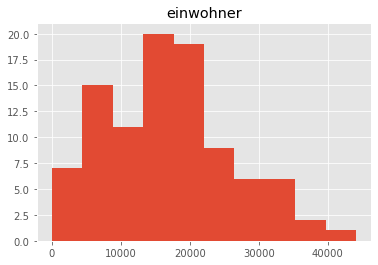

In [9]:
ein_hist.hist()

Grouping the areas to see the real number of habitants

In [10]:
grouped_df = am_df.groupby(by=["Ort"], dropna=False).sum()
grouped_df.sort_values(['einwohner'],ascending=False)

,einwohner
Ort,
Frankfurt am Main,668287
Offenbach am Main,113241
Bad Homburg vor der Höhe,51397
Oberursel,44125
Hofheim am Taunus,37735
Maintal,35827
Neu-Isenburg,34716
"Idstein, Hünstetten",33269
Bad Vilbel,31268


In [11]:
print("Total number of inhabitants:", am_df['einwohner'].sum())

Total number of inhabitants: 1605198


Graphing Habitants (eihnwohner) variable

In [16]:
graph_df = am_df[['PLZ','Ort','einwohner']].copy()

In [17]:
graph_df['PLZ_Ort'] = graph_df[['PLZ', 'Ort']].agg('-'.join, axis=1)

In [18]:
graph_df.set_index('PLZ_Ort', inplace=True)
graph_df.drop(['PLZ','Ort'], axis=1, inplace=True)

In [19]:
graph_df.head()

,einwohner
PLZ_Ort,
65520-Bad Camberg,13931
61348-Bad Homburg vor der Höhe,13333
61352-Bad Homburg vor der Höhe,16594
61350-Bad Homburg vor der Höhe,21470
61231-Bad Nauheim,30209


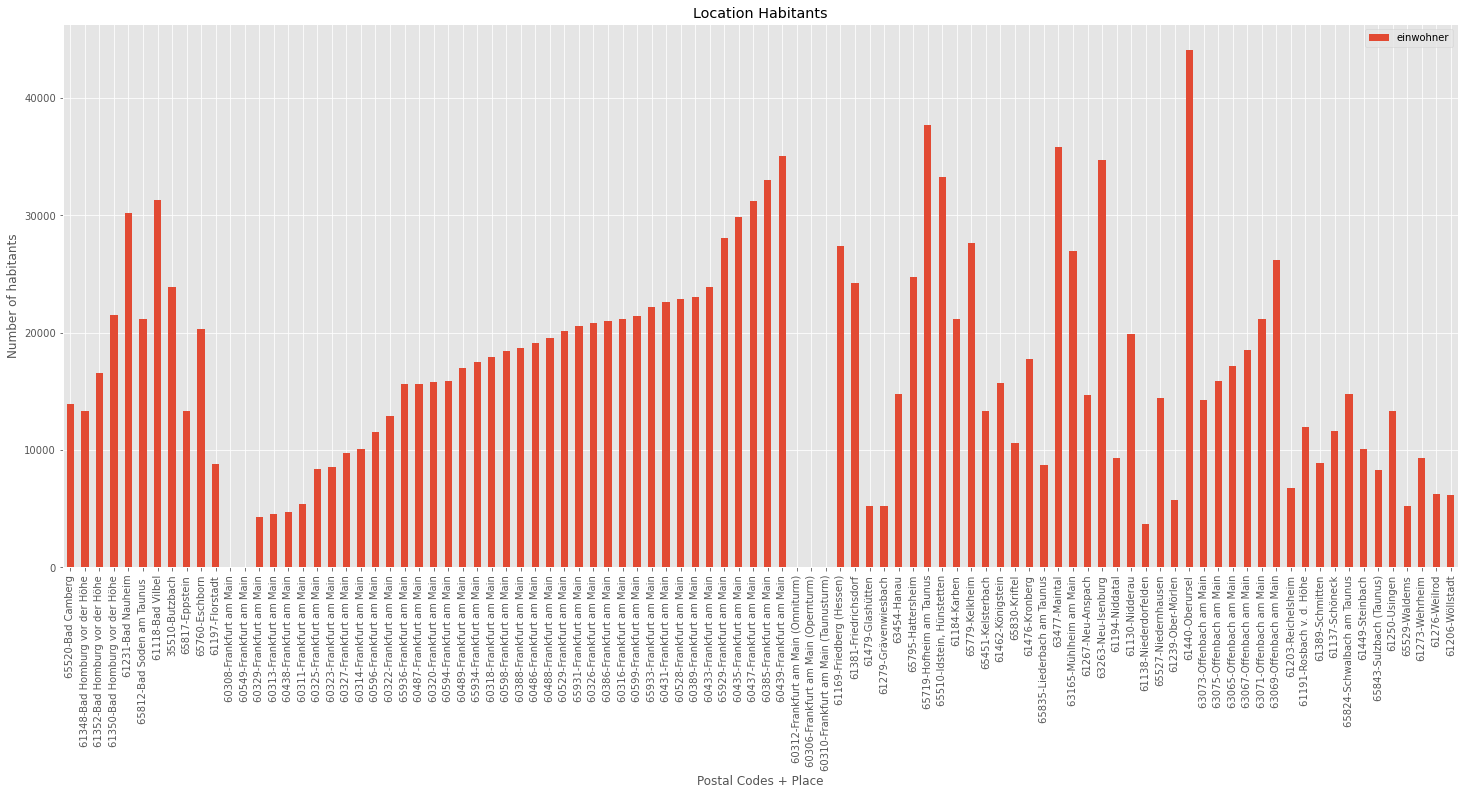

In [27]:
graph_df.plot(kind='bar',
             figsize=(25, 10))

plt.title('Location Habitants')
plt.ylabel('Number of habitants')
plt.xlabel('Postal Codes + Place')

plt.show()

From the analysis we reach the conclusion that there are areas where we don't have inhabitants, so we decided that we will drop the correspondent rows. 

We will drop all places which have less than 100 inhabitants, this number is arbitrarily defined to exclude low density areas wich will probably have fewer amenities to study and where it should be impossible to purchase a home.

In [36]:
#let's drop all rows with less than 100 persons
am_df.drop(am_df.loc[am_df['einwohner']<100].index, inplace=True)
print("New dataset: ",am_df.shape)

New dataset:  (91, 5)


Enumerating the number of areas to study

In [ ]:
am_df.groupby(['Ort'])['PLZ'].count().to_frame()

1. 45 City centers 
2. 37 Frankfurt am Main postal codes areas
3. 06 Offenbach am Main postal codes areas
4. 03 Bad Homburg vor der Höhe postal codes areas 


Total of 91 areas to search amenities

**Getting the coordinates**

To get the coordinates we are going to use the Nominatim api and acess the Openstreetmap database.

We will find latitude and longitude for each city center and postal code area (Frankfurt am Main, Bad Homburg vor der Höhe and Offenbach am Main)

In [37]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geocoder = Nominatim(user_agent="hg_explorer")
geocode = RateLimiter(geocoder.geocode, min_delay_seconds = 1,   return_value_on_exception = None)

def custom_geocoder(postal,local):
    if(local in ['Frankfurt am Main', 'Bad Homburg vor der Höhe', 'Offenbach am Main']):
        address1 = str(postal) + " Deutschland"
        location = geocode(address1)
    #    return pd.Series({'Latitude': location.latitude, 'Longitude': location.longitude})
    else:
        address1 = str(local) + ", Hessen"
        location = geocode(address1)
    return pd.Series({'Latitude': location.latitude, 'Longitude': location.longitude})

am_df[['latitude' , 'longitude']] = am_df[['PLZ','Ort']].apply(lambda x: custom_geocoder(x['PLZ'], x['Ort']), axis=1)

#[['PLZ','Ort']]

#df['CustomRating'] = df.apply(lambda x: custom_rating(x['Genre'],x['Rating']),axis=1)

Let's see what we got

In [ ]:
am_df

Next we are going to explore the distance between the diferent points we collected by creating a distance matrix.

For this distance matrix we will be using the haversine (or great circle) distance wich is the angular distance between two points on the surface of a sphere.

In [ ]:
#distance matrix
from sklearn.neighbors import DistanceMetric
from math import radians
import numpy as np

matrix = am_df[['PLZ', 'Ort','latitude','longitude']].copy()

In [ ]:
matrix['PLZ_Ort'] = matrix[['PLZ', 'Ort']].agg('-'.join, axis=1)

In [ ]:
matrix.drop(['PLZ','Ort'], axis=1, inplace=True)

In [ ]:
matrix['latitude'] = np.radians(matrix['latitude'])
matrix['longitude'] = np.radians(matrix['longitude'])

In [ ]:
dist = DistanceMetric.get_metric('haversine')

In [ ]:
pd.DataFrame(dist.pairwise(matrix[['latitude','longitude']].to_numpy())*6371,  columns=matrix.PLZ_Ort.unique(), index=matrix.PLZ_Ort.unique()).round(decimals=2)

This distance matrix show us the shortest distance in kilometers between two points on a sphere (Earth) using their latitudes and longitudes measured along the surface. It is important for use in navigation.

2. Now lets see our areas of study in a map

In [ ]:
def get_center_latlong(df):
    # get the center of my map for plotting
    centerlat = (am_df['latitude'].max() + am_df['latitude'].min()) / 2
    centerlong = (am_df['longitude'].max() + am_df['longitude'].min()) / 2
    return centerlat, centerlong

center = get_center_latlong(am_df)

In [ ]:
import folium
#from branca.element import Figure

#fig2=Figure(width=550,height=350)

map_target = folium.Map(location=center, zoom_start=10, tiles="Stamen Toner")

# add markers to map
for lat, lng, ort, orts, plz in zip(am_df['latitude'], am_df['longitude'], am_df['Ort'], am_df['Ortsteile'], am_df['PLZ']):
    if(ort in ['Frankfurt am Main', 'Offenbach am Main']):
        label = '{}, {}, {}'.format(ort, orts, plz)
        label = folium.Popup(label, parse_html=True)
        folium.Circle([lat, lng],
                      radius=500,
                      popup=label,
                      color='red',
                      fill=True,
                      fill_color='#f73447',
                      fill_opacity=0.7,
                      parse_html=False).add_to(map_target)
    else:
        label = '{}, {}, {}'.format(ort, orts, plz)
        label = folium.Popup(label, parse_html=True)
        folium.Circle([lat, lng],
                      radius=1000,
                      popup=label,
                      color='blue',
                      fill=True,
                      fill_color='#3186cc',
                      fill_opacity=0.7,
                      parse_html=False).add_to(map_target)

        
#fig2.add_child(map_target)
#folium.TileLayer('Stamen Terrain').add_to(map_target)
#folium.TileLayer('Stamen Toner').add_to(m2)
#folium.TileLayer('Stamen Water Color').add_to(map_target)
#folium.TileLayer('cartodbpositron').add_to(map_target)
#folium.TileLayer('cartodbdark_matter').add_to(map_target)
#folium.LayerControl().add_to(map_target)

map_target

In the above map we can see all areas involved in this study. Here you can see blue and red circles, these circles represent the individual areas where we will search for amenities. A blue circle area is 1000 meters and the red circle area is 500 meters.

We decided that for this study, to try to diminish overlapping between areas, particularly in Frankfurt am Main and in Offenbach am Main, we would have to different radius, hence 500 and 1000 meters.

3. Using the Foursquare API let's collect the amenities data

In [ ]:
#get foursquare data

In [31]:
#open file and read credentials
f=open("foursquare_cred.txt","r")
lines=f.readlines()
clientId=lines[1].rstrip("\n")
clientSecret=lines[3].rstrip("\n")
f.close()

In [32]:
CLIENT_ID = clientId # your Foursquare ID
CLIENT_SECRET = clientSecret # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentials were uploaded!')

Your credentials were uploaded!


In [30]:
name1 = "fred"
radius1 = 500

print("{} and {}".format(name1, radius1))


fred and 500


In [38]:
import requests

def getNearbyAmenities(names, latitudes, longitudes):    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        if(name in ['Frankfurt am Main', 'Offenbach am Main']):
            radius = 500
            

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
            
            print("{} and {}".format(name, radius))

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = ['Neighborhood', 
                          'Neighborhood Latitude', 
                          'Neighborhood Longitude', 
                          'Venue', 
                          'Venue Latitude', 
                          'Venue Longitude', 
                          'Venue Category']
        else:
            #print("fora",name)
            radius = 1000
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
            
            print("{} and {}".format(name, radius))

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = ['Neighborhood', 
                          'Neighborhood Latitude', 
                          'Neighborhood Longitude', 
                          'Venue', 
                          'Venue Latitude', 
                          'Venue Longitude', 
                          'Venue Category']    
    return(nearby_venues)

In [39]:
amenities = getNearbyAmenities(names=am_df['Ort'],
                                   latitudes=am_df['latitude'],
                                   longitudes=am_df['longitude']
                                  )

Bad Camberg and 1000
Bad Homburg vor der Höhe and 1000


KeyError: 'groups'

In [41]:
print (results.content)

NameError: name 'results' is not defined

In [42]:
amenities

NameError: name 'amenities' is not defined

In [ ]:
print(amenities.shape)
amenities.head()

In [ ]:
amenities

In [ ]:
#analyse the data

In [ ]:
print('There are {} uniques categories.'.format(len(amenities['Venue Category'].unique())))

In [ ]:
df_am = amenities.copy()
df_am.groupby('Venue Category').count()

In [ ]:
df_cat = df_am.groupby('Venue Category').count()

In [ ]:
#não testado
def category_coder(category):
    if(category in ['','']):
        return pd.Series({'Coded_Cat': 'categ aqui'})
    if(category in ['','']):
        return pd.Series({'Coded_Cat': 'categ aqui'})
    if(category in ['','']):
        return pd.Series({'Coded_Cat': 'categ aqui'})    
    return pd.Series({'Coded_Cat': 'Miscellaneous'})

df[['Coded_Cat']] = df.Venue_Cat.apply(lambda x: category_coder(x) if x else None)

In [ ]:
#criar uma sub dataframe 
options = ['Bistro', 'Restaurant'] 
  
# selecting rows based on condition 
rslt_df = df_am[df_am['Venue Category'].isin(options)] 

In [ ]:
df_cat.reset_index(level=0, inplace=True)

In [ ]:
df_cat

In [ ]:
df_am.groupby('Neighborhood').count()

In [ ]:
#prepare data

In [ ]:
#vizualization stuff

In [ ]:
map_venues = folium.Map(location=center, zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_am['Venue Latitude'], df_am['Venue Longitude'], df_am['Venue'], df_am['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues)    
map_venues

In [ ]:
#Kmeans preparation - one hot 

In [ ]:
#evaluate best number of clusters

In [ ]:
#create kmeans

In [ ]:
#analyse clusters

In [ ]:
#conclusions